In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
df = pd.read_json('../Data/combined_onehot.json')
df.head()

,SalePrice,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,Area,SqFtLot,WfntFootage,PropertyType_3,PropertyType_11,SmallLakeRiverCreek_2.0,...,FinBasementGrade_3.0,FinBasementGrade_4.0,FinBasementGrade_5.0,FinBasementGrade_6.0,FinBasementGrade_7.0,FinBasementGrade_8.0,FinBasementGrade_9.0,FinBasementGrade_10.0,FinBasementGrade_11.0,FinBasementGrade_12.0
1085621070,543950,2744,0,56,62,4770,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9577910050,609950,3265,0,30,27,7424,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9577910070,629950,3341,0,49,27,8527,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9577910080,644950,3265,0,30,27,6501,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2525059126,541000,1030,0,210,91,13503,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['SalePrice', 'SqFtTotLiving', 'SqFtDeck', 'SqFtOpenPorch', 'Area',
       'SqFtLot', 'WfntFootage', 'PropertyType_3', 'PropertyType_11',
       'SmallLakeRiverCreek_2.0', 'SmallLakeRiverCreek_3.0',
       'SmallLakeRiverCreek_4.0', 'WfntBank_1.0', 'WfntBank_2.0',
       'WfntBank_3.0', 'WfntBank_4.0', 'WfntPoorQuality_1.0',
       'WfntRestrictedAccess_1.0', 'WfntRestrictedAccess_2.0',
       'WfntRestrictedAccess_3.0', 'WfntLocation_1.0', 'WfntLocation_3.0',
       'WfntLocation_4.0', 'WfntLocation_5.0', 'WfntLocation_6.0',
       'WfntLocation_7.0', 'WfntLocation_8.0', 'WfntLocation_9.0',
       'TidelandShoreland_1.0', 'TidelandShoreland_2.0',
       'TidelandShoreland_3.0', 'FinBasementGrade_2.0', 'FinBasementGrade_3.0',
       'FinBasementGrade_4.0', 'FinBasementGrade_5.0', 'FinBasementGrade_6.0',
       'FinBasementGrade_7.0', 'FinBasementGrade_8.0', 'FinBasementGrade_9.0',
       'FinBasementGrade_10.0', 'FinBasementGrade_11.0',
       'FinBasementGrade_12.0'],
      dtyp

In [4]:
df_orig= pd.read_json('../Data/combined.json')
df_orig.head()

,SalePrice,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,Area,SqFtLot,WfntFootage,PropertyType,SmallLakeRiverCreek,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntLocation,TidelandShoreland,FinBasementGrade
1085621070,543950,2744,0,56,62,4770,0,2,0,0,0,0,0,0,0
9577910050,609950,3265,0,30,27,7424,0,2,0,0,0,0,0,0,0
9577910070,629950,3341,0,49,27,8527,0,2,0,0,0,0,0,0,0
9577910080,644950,3265,0,30,27,6501,0,2,0,0,0,0,0,0,0
2525059126,541000,1030,0,210,91,13503,0,11,0,0,0,0,0,0,0


In [5]:
#pd.plotting.scatter_matrix(df, figsize =[12,12]); way to big baby

In [6]:
df.corr()

,SalePrice,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,Area,SqFtLot,WfntFootage,PropertyType_3,PropertyType_11,SmallLakeRiverCreek_2.0,...,FinBasementGrade_3.0,FinBasementGrade_4.0,FinBasementGrade_5.0,FinBasementGrade_6.0,FinBasementGrade_7.0,FinBasementGrade_8.0,FinBasementGrade_9.0,FinBasementGrade_10.0,FinBasementGrade_11.0,FinBasementGrade_12.0
SalePrice,1.000000,0.606981,0.209401,0.284943,-0.014113,0.080203,0.059815,-0.019966,0.001203,0.016741,...,-0.008098,-0.002377,-0.033963,-0.067503,-0.024316,0.117238,0.253334,0.193462,0.143832,0.062519
SqFtTotLiving,0.606981,1.000000,0.192824,0.417759,0.123242,0.140813,0.019707,-0.045101,-0.020888,0.003480,...,-0.014356,-0.024324,-0.063201,-0.073646,0.000066,0.105374,0.212563,0.190755,0.136711,0.088129
SqFtDeck,0.209401,0.192824,1.000000,-0.053903,-0.015068,0.105182,0.051955,0.001949,0.019274,0.066370,...,-0.005444,-0.000205,-0.014624,0.011177,0.081750,0.140460,0.160737,0.117518,0.068587,0.048389
SqFtOpenPorch,0.284943,0.417759,-0.053903,1.000000,0.127664,0.142667,0.050357,-0.040462,-0.028133,0.028572,...,-0.007428,-0.008445,-0.037340,-0.098124,-0.118013,-0.017653,0.076477,0.068133,0.051015,0.042913
Area,-0.014113,0.123242,-0.015068,0.127664,1.000000,0.125170,0.032237,-0.013493,0.000319,0.010185,...,0.001778,-0.016569,-0.043156,-0.058979,-0.087911,-0.084262,-0.051911,-0.001734,0.012402,0.009113
SqFtLot,0.080203,0.140813,0.105182,0.142667,0.125170,1.000000,0.200052,0.046063,-0.020935,0.017373,...,0.001814,-0.006131,-0.008846,-0.025129,-0.031139,-0.024741,-0.005164,0.026434,0.020165,0.005869
WfntFootage,0.059815,0.019707,0.051955,0.050357,0.032237,0.200052,1.000000,0.021341,-0.012989,0.179741,...,-0.001296,-0.000420,-0.004514,-0.007445,-0.012129,-0.006089,0.009091,0.008801,-0.001388,0.029577
PropertyType_3,-0.019966,-0.045101,0.001949,-0.040462,-0.013493,0.046063,0.021341,1.000000,-0.877546,0.011588,...,0.002100,0.010251,0.013670,0.039221,0.016375,-0.029913,-0.018309,-0.006978,-0.004115,0.011991
PropertyType_11,0.001203,-0.020888,0.019274,-0.028133,0.000319,-0.020935,-0.012989,-0.877546,1.000000,-0.004742,...,0.000494,-0.004820,0.001796,-0.001187,0.021359,-0.004814,-0.000073,0.006354,0.009724,-0.013181
SmallLakeRiverCreek_2.0,0.016741,0.003480,0.066370,0.028572,0.010185,0.017373,0.179741,0.011588,-0.004742,1.000000,...,-0.001296,-0.002594,-0.002595,-0.001915,-0.003610,-0.006052,0.005635,0.015782,-0.002979,-0.001236


In [7]:
data_pred = df.iloc[:,2:50]
data_pred.head()

,SqFtDeck,SqFtOpenPorch,Area,SqFtLot,WfntFootage,PropertyType_3,PropertyType_11,SmallLakeRiverCreek_2.0,SmallLakeRiverCreek_3.0,SmallLakeRiverCreek_4.0,...,FinBasementGrade_3.0,FinBasementGrade_4.0,FinBasementGrade_5.0,FinBasementGrade_6.0,FinBasementGrade_7.0,FinBasementGrade_8.0,FinBasementGrade_9.0,FinBasementGrade_10.0,FinBasementGrade_11.0,FinBasementGrade_12.0
1085621070,0,56,62,4770,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9577910050,0,30,27,7424,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9577910070,0,49,27,8527,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9577910080,0,30,27,6501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2525059126,0,210,91,13503,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_corr=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)


df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))


df_corr.set_index(['pairs'], inplace = True)


df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

In [9]:
df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

,cc
pairs,
"(PropertyType_3, PropertyType_11)",0.877546


In [10]:
#data_pred.drop(columns=['prptytyp_3','prptytyp_11', 'wtrloc_7.0', 'laksam_4.0', 'cdtn_3.0', 'cdtn_4.0', 'wtrloc_6.0', 'lakewas_4.0'], inplace = True)
#data_pred.shape

#data_pred.drop(columns ='WfntFootage', inplace = True) #choosing to keep SqFtLot isntead of WfntFootage 
                                                        #because all house types have lots as opposed to 
                                                        #having waterfronts


In [11]:
#data_pred



In [12]:
#data_pred.corr()

In [13]:
df.columns

Index(['SalePrice', 'SqFtTotLiving', 'SqFtDeck', 'SqFtOpenPorch', 'Area',
       'SqFtLot', 'WfntFootage', 'PropertyType_3', 'PropertyType_11',
       'SmallLakeRiverCreek_2.0', 'SmallLakeRiverCreek_3.0',
       'SmallLakeRiverCreek_4.0', 'WfntBank_1.0', 'WfntBank_2.0',
       'WfntBank_3.0', 'WfntBank_4.0', 'WfntPoorQuality_1.0',
       'WfntRestrictedAccess_1.0', 'WfntRestrictedAccess_2.0',
       'WfntRestrictedAccess_3.0', 'WfntLocation_1.0', 'WfntLocation_3.0',
       'WfntLocation_4.0', 'WfntLocation_5.0', 'WfntLocation_6.0',
       'WfntLocation_7.0', 'WfntLocation_8.0', 'WfntLocation_9.0',
       'TidelandShoreland_1.0', 'TidelandShoreland_2.0',
       'TidelandShoreland_3.0', 'FinBasementGrade_2.0', 'FinBasementGrade_3.0',
       'FinBasementGrade_4.0', 'FinBasementGrade_5.0', 'FinBasementGrade_6.0',
       'FinBasementGrade_7.0', 'FinBasementGrade_8.0', 'FinBasementGrade_9.0',
       'FinBasementGrade_10.0', 'FinBasementGrade_11.0',
       'FinBasementGrade_12.0'],
      dtyp

In [14]:
#df.drop(columns = ['WfntFootage','prptytyp_3','prptytyp_11', 'wtrloc_7.0', 'laksam_4.0', 'cdtn_3.0', 'cdtn_4.0', 'wtrloc_6.0', 'lakewas_4.0'], inplace = True)

In [15]:
#df.drop(columns='DocumentDate', inplace= True)

In [16]:
from src.mymods import correlation_info

(['SqFtTotLiving',
  'SqFtOpenPorch',
  'FinBasementGrade_9.0',
  'SqFtDeck',
  'FinBasementGrade_10.0',
  'FinBasementGrade_11.0',
  'WfntLocation_6.0',
  'FinBasementGrade_8.0',
  'TidelandShoreland_2.0',
  'WfntBank_1.0'],
 <matplotlib.axes._subplots.AxesSubplot at 0x1d38a8e11f0>)

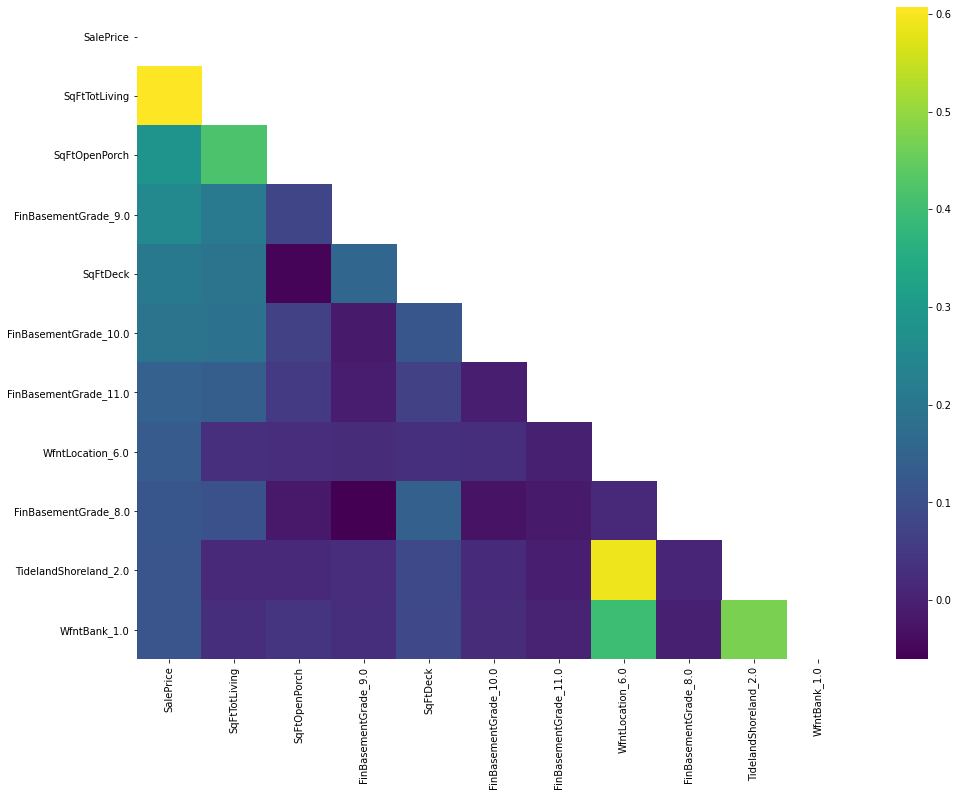

In [16]:
correlation_info(df,'SalePrice', .10)

In [17]:
from src.mymods import model_summary

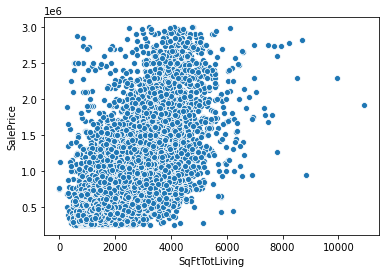

In [18]:
sns.scatterplot(y=df.SalePrice, x =df.SqFtTotLiving)

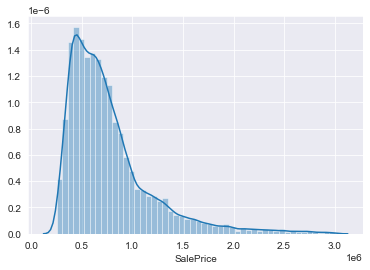

In [19]:
sns.set_style('darkgrid')
sns.distplot(df.SalePrice)

In [20]:
porch_data= df[['SalePrice', 'SqFtOpenPorch']]
porch_data.head()

,SalePrice,SqFtOpenPorch
1085621070,543950,56
9577910050,609950,30
9577910070,629950,49
9577910080,644950,30
2525059126,541000,210


In [21]:
porch_sale_price= df[(df.SqFtOpenPorch > 0)]
no_porch_sale_price = df[(df.SqFtOpenPorch == 0)]
df_porch= ['porch_sale_price','no_porch_sale_price']

In [22]:
porch_sales = porch_sale_price['SalePrice']
no_porch_sales = no_porch_sale_price['SalePrice']
porch_mean= porch_sales.mean()
no_porch_sale_price_mean = no_porch_sales.mean()

print(porch_mean)
print(no_porch_sale_price_mean)

852521.5150636019
677324.3884430176


In [23]:
porch_sales

1085621070     543950
9577910050     609950
9577910070     629950
9577910080     644950
2525059126     541000
               ...   
7942601685     850000
1625079011    2400000
9514050600     921000
809001865      890000
7694210140     640000
Name: SalePrice, Length: 13443, dtype: int64

In [24]:
from scipy import stats

In [25]:
stats.ttest_ind(porch_sales, no_porch_sales)

Ttest_indResult(statistic=34.16651183308108, pvalue=2.7343047014148394e-250)

In [26]:
diff_mean = porch_mean - no_porch_sale_price_mean

In [27]:
diff_mean

175197.12662058428

In [28]:
df_orig.columns


Index(['SalePrice', 'SqFtTotLiving', 'SqFtDeck', 'SqFtOpenPorch', 'Area',
       'SqFtLot', 'WfntFootage', 'PropertyType', 'SmallLakeRiverCreek',
       'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess', 'WfntLocation',
       'TidelandShoreland', 'FinBasementGrade'],
      dtype='object')

In [29]:
ax = sns.barplot(x='Bedrooms', y='SalePrice', data= df_orig, palette='Blues_d')


ValueError: Could not interpret input 'Bedrooms'

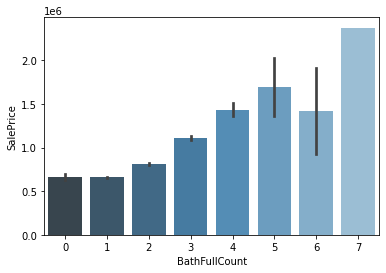

In [51]:
ax1 = sns.barplot(x= 'BathFullCount', y='SalePrice', data= df_orig, palette= "Blues_d")


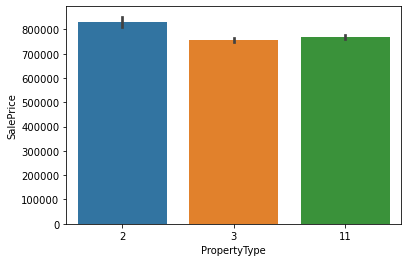

In [24]:
sns.barplot(x='PropertyType', y='SalePrice', data= df_orig)

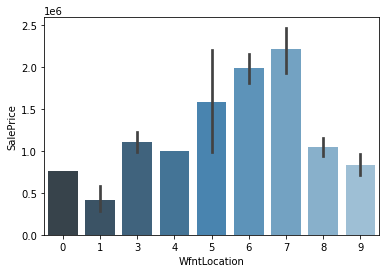

In [52]:
ax2 = sns.barplot(y= 'SalePrice', x='WfntLocation', data= df_orig, palette="Blues_d")


In [26]:
basement= pd.read_json('../Data/presentation.json')

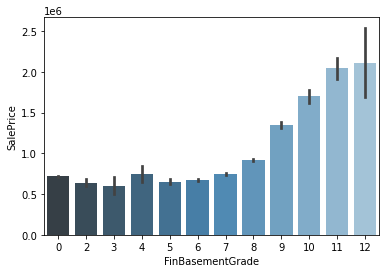

In [53]:
basement
ax4=sns.barplot(y='SalePrice', x= 'FinBasementGrade', data=basement, palette="Blues_d")


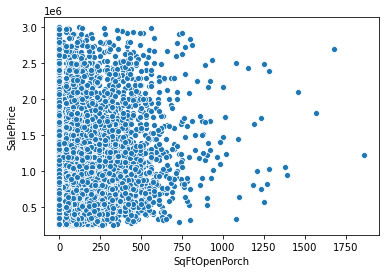

In [61]:
sns.lineplot(y='SalePrice', x= 'SqFtOpenPorch', data= df)

In [37]:
df_orig

,SalePrice,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,Area,SqFtLot,WfntFootage,PropertyType,LakeWashington,LakeSammamish,SmallLakeRiverCreek,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,TidelandShoreland,Bedrooms,BathFullCount,FinBasementGrade
1085621070,543950,2744,0,56,62,4770,0,2,0,0,0,0,0,0,0,0,4,2,0
9577910050,609950,3265,0,30,27,7424,0,2,0,0,0,0,0,0,0,0,4,2,0
9577910070,629950,3341,0,49,27,8527,0,2,0,0,0,0,0,0,0,0,4,3,0
9577910080,644950,3265,0,30,27,6501,0,2,0,0,0,0,0,0,0,0,4,2,0
2525059126,541000,1030,0,210,91,13503,0,11,0,0,0,0,0,0,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625079011,2400000,1260,0,60,94,1644825,1330,3,0,0,0,9,1,0,0,0,3,1,0
945000570,1150000,2820,220,0,6,4650,0,11,0,0,0,0,0,0,0,0,4,2,9
9514050600,921000,2280,0,110,35,4197,0,11,0,0,0,0,0,0,0,0,3,2,0
809001865,890000,1820,0,70,12,4000,0,3,0,0,0,0,0,0,0,0,3,1,0


In [40]:
f = 'SalePrice~SqFtTotLiving + SqFtOpenPorch'
model= ols(formula=f, data=df_orig).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     7593.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:17:44   Log-Likelihood:            -3.6626e+05
No. Observations:               25903   AIC:                         7.325e+05
Df Residuals:                   25900   BIC:                         7.326e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.735e+05   5366.623     32.323      0.000    1.63e+05    1.84e+05
SqFtTotLiving   270.3758      2.484    108.859      0.000     265.508     275.244
SqFtOpenPorch   133.8007     19.118      6.999      0.000      96.329     171.272
==============================================================================
Omnibus:                     8134.790   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35846.611
Skew:                           1.484   Prob(JB):                         0.00
Kurtosis:                       7.940   Cond. No.                     6.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
saleprice = df[df.SalePrice <= 3000000]

In [27]:
saleprice.SalePrice.mean()

768247.2534841524

In [29]:
saleprice.SalePrice.describe()

count    2.590300e+04
mean     7.682473e+05
std      4.215244e+05
min      2.510000e+05
25%      4.800000e+05
50%      6.599500e+05
75%      9.000000e+05
max      2.999000e+06
Name: SalePrice, dtype: float64